# Calcul Numeric - Lab 1

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

#### Probleme propuse: 5, 7, 8
#### Probleme obligatorii:  8

## Problema 5

###### Deduceti seria Taylor pentru ln(1 +x) si aproximati ln(2) folosind primii 8 termeni. Cati termeni sunt necesari pentru a obtine ln(2) cu 5 zecimalecorecte?  La fel pentru ln((1+x) / (1−x)).

1. a)Deduceti seria Taylor pentru ln(1 +x) si aproximati ln(2) folosind primii 8 termeni.

Polinomul Taylor pentru ln(1+x):

In [7]:
x = var('x')
taylor_series = log(1 + x).taylor(x, 0, 8)
taylor_polynomial = taylor_series.polynomial(QQ)
show(taylor_polynomial)


-1/8*x^8 + 1/7*x^7 - 1/6*x^6 + 1/5*x^5 - 1/4*x^4 + 1/3*x^3 - 1/2*x^2 + x

Aproximarea si comparatia fata de ln(2):

In [15]:
taylor_eval = taylor_polynomial.subs(x=1)
ln2_exact = log(2).n()
ln2_approx = taylor_eval.n()
show("ln(2) exact=", ln2_exact)
show("ln(2) aprox=", ln2_approx)

'ln(2) exact=' 0.693147180559945

'ln(2) aprox=' 0.634523809523809

1. b)Cati termeni sunt necesari pentru a obtine ln(2) cu 5 zecimalecorecte?

Intr-o serie alternanta, modulul erorii < modulul primului termen neglijat.  
=> modulul primului termen neglijat < 10^(-5).  
Din foruma (7) din curs 1 =>   
(-1)^(n+1) * 1/(n+2) < 10^(-5)  

In [17]:
var('n')
solve(1/(n + 2) < 1/10^5, n)

[[n < -2], [n > 99998]]

Este nevoie de > 99998 termeni pentru precizia de 5 zecimale

1. c)La fel pentru ln((1+x) / (1−x))

In [47]:
x = var('x')
taylor_series = log(1 + 2*x/(1 - x)).taylor(x, 0, 15)
taylor_polynomial = taylor_series.polynomial(QQ)
show(taylor_polynomial)

2/15*x^15 + 2/13*x^13 + 2/11*x^11 + 2/9*x^9 + 2/7*x^7 + 2/5*x^5 + 2/3*x^3 + 2*x

In [48]:
taylor_eval = taylor_polynomial(x=1/3)
ln2_exact = log(2).n()
ln2_approx = taylor_eval.n()
ln2_exact, ln2_approx


ln2_exact_prec =ln2_exact.n(digits=5)
ln2_approx_prec =ln2_approx.n(digits=5)
show(ln2_exact_prec)
show(ln2_approx_prec)

0.69315

0.69315

Deoarece nu avem o formula, putem deduce ordinul necesar pentru precizia cu 5 zecimale prin calcul repetat:

In [57]:
x = var('x')
counter = var('counter')
ln2_exact = log(2).n()
ln2_exact_prec =ln2_exact.n(digits=5)
counter = 1
while True:
    taylor_series = log(1 + 2*x/(1 - x)).taylor(x, 0, counter)
    taylor_polynomial = taylor_series.polynomial(QQ)
#     show(taylor_polynomial)
    
    taylor_eval = taylor_polynomial(x=1/3)
    ln2_approx = taylor_eval.n()
    ln2_approx_prec =ln2_approx.n(digits=5)
#     show(ln2_exact_prec)
#     show(ln2_approx_prec)
    if ln2_approx_prec == ln2_exact_prec:
        break
    counter = counter + 1
show("Precision 5 can be found at n=" , counter)

'Precision 5 can be found at n=' 11

## Problema 7

O functie af∈Cn[a,b] se poateaproxima, utilizand seria Maclaurin trunchiata, printr-un polinom de grad n f(x)≈Tn(x) =n∑i=0ci xi , unde ci=f(i)(0)/i!.  
(a)  Reprezentati grafic si comparati graficele lui f(x)=ex ̧si ale polinoamelor(T2f) (x), (T3f) (x), (T4f) (x), (T5f) (x).  
Aproximeaza multumitor poli-noamele Tn f de grad mare functi a exp e un interval din ce in ce mai mare centrat ın jurul originii?  
(b)  Repetati pentru g(x) = ln(1 +x).

1. Aproximare cu serii McLaurin f1(x) = exp(x)


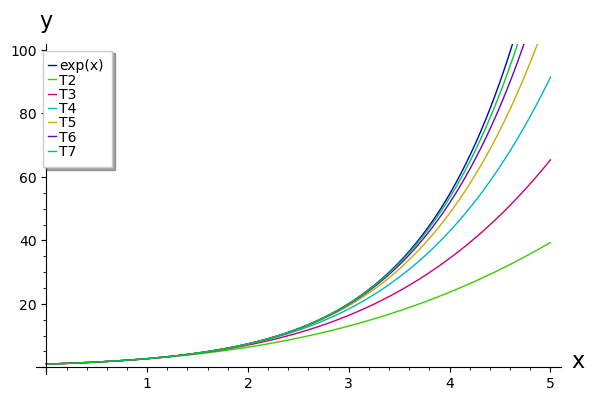

In [8]:
x = var('x')

def taylor_polynomial(n, x):
    taylor_series = exp(x).taylor(x, 0, n+1)
    return taylor_series.polynomial(QQ)

p = plot([exp(x)] + [taylor_polynomial(k, x) for k in range(2, 8)], 
         (x, 0, 5), 
         ymin=0, 
         ymax=100, 
         legend_label=["exp(x)", "T2", "T3", "T4", "T5", "T6", "T7"],
         figsize=[6,4],
         axes_labels=["x", "y"])
show(p)


1. b) Aproximare cu serii McLaurin : g(x) = ln(1 + x)

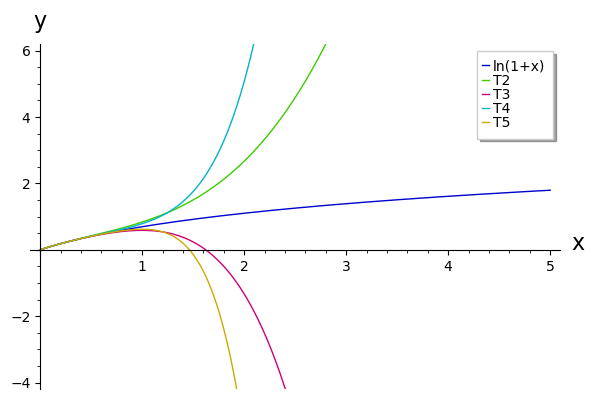

In [9]:
x = var('x')

def taylor_polynomial(n, x):
    taylor_series = ln(1 + x).taylor(x, 0, n+1)
    return taylor_series.polynomial(QQ)

q = plot([ln(1+x)] + [taylor_polynomial(k, x) for k in range(2, 6)], 
         (x, 0, 5),
         ymin=-4, 
         ymax=6, 
         legend_label=["ln(1+x)", "T2", "T3", "T4", "T5"],
         figsize=[6,4],
         axes_labels=["x", "y"])
show(q)

## Problema 8

1. (a)  Implementat ̧i aproximarea Pade pentru f,k,m date.

In [29]:
def pade(f, m, k):
    """
    Function for pade rational approximation
    :param: f - function to be approximated
    :m: - order of the frist polynomial
    :k: - order of the second polynomial
    :return: - function representing pade's approximation
    """
    c = [derivative(f, x, i)(x = 0)/factorial(i) for i in range(m + k + 1)]
    
    C = matrix.toeplitz([c[m + i] for i in range(k)], [c[m - i] if m - i > 0 else 0 for i in range(1, k)])
    R = vector([-c[i] for i in range(m + 1, m + k + 1)])
    B = C.solve_right(R)
    B_coeff = [1] + [elem for elem in B]
    if m > k:
        for i in range(k + 1, m + 1):
            B_coeff.append(0)
    B = vector(B_coeff)
    A = [
            sum([c[j - l] * B[l] for l in range(j + 1)])
            for j in range(m + 1)
    ]
    show(C)
    show(R)
    show(B)
    show(B_coeff)
    return sum([A[i]*x^i for i in range(m + 1)])/sum([B[i]*x^i for i in range(k + 1)])
show("Pade approximation for exp(x), n=2, m=2")
R11(x) = pade(exp(x), 2, 2)


'Pade approximation for exp(x), n=2, m=2'

[1/2   1]
[1/6 1/2]

(-1/6, -1/24)

(1, -1/2, 1/12)

[1, -1/2, 1/12]

b) Determinat ̧i funct ̧iile rat ̧ionaleR1,1(x)  ̧siR2,2(x) pentruf(x) =ex. Reprezentat ̧igrafic  ̧si comparat ̧i graficele luif(x) =ex,R1,1 ̧siR2,2.  Sunt satisf ̆ac ̆atoareaceste aproximat ̧ii rat ̧ionale ale luiexpe [−1,1]?  Cum se comport ̆a com-parativ cu seriile Maclaurin trunchiate din problemele precedente

In [11]:
#Computing Pade's approximations of e^x
R11(x) = pade(exp(x), 1, 1)
R22(x) = pade(exp(x), 2, 2)

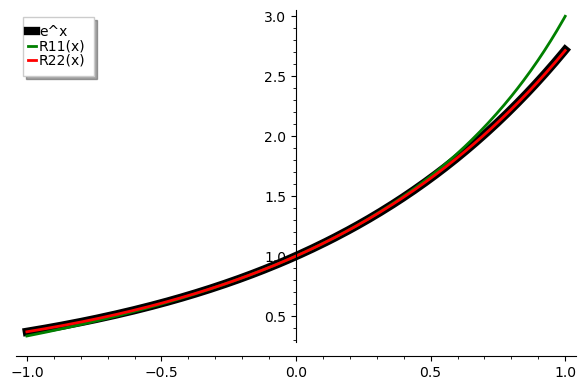

In [12]:
p1 = plot(exp(x), (x, -1, 1), thickness=6, color='black', legend_label='e^x')
p2 = plot(R11(x), (x, -1, 1), thickness=2, color='green', legend_label = 'R11(x)')
p3 = plot(R22(x), (x, -1, 1), thickness=2, color='red', legend_label = 'R22(x)')

p1 + p2 + p3

1. b) Repetati pentru aproximarile R2,2(x) si R3,1(x) ale functiei g(x) = ln(1 +x).

In [13]:
#Computing Pade's approximations of ln(1 + x)
R22(x) = pade(ln(1 + x), 2, 2)
R31(x) = pade(ln(1 + x), 3, 1)

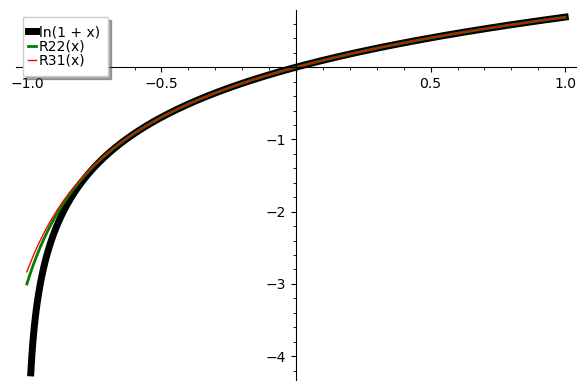

In [14]:
p1 = plot(ln(1 + x), (x, -1, 1), thickness=5, color='black', legend_label='ln(1 + x)')
p2 = plot(R22(x), (x, -1, 1), thickness=2, color='green', legend_label = 'R22(x)')
p3 = plot(R31(x), (x, -1, 1), thickness=1, color='red', legend_label = 'R31(x)')

p1 + p2 + p3

1. c) Repetati pentru aproximarile R2,2(x) si R3,1(x) ale functiei g(x) = cos(x).

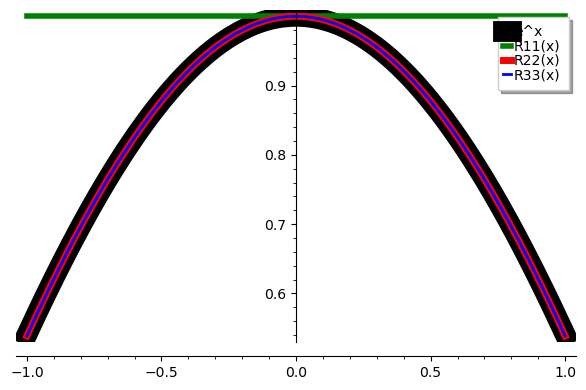

In [15]:
#Computing Pade's approximations of cos(x)
R11(x) = pade(cos(x), 1, 1)
R22(x) = pade(cos(x), 2, 2)
R22(x) = pade(cos(x), 3, 3)
p1 = plot(cos(x), (x, -1, 1), thickness=15, color='black', legend_label='e^x')
p2 = plot(R11(x), (x, -1, 1), thickness=4, color='green', legend_label = 'R11(x)')
p3 = plot(R22(x), (x, -1, 1), thickness=5, color='red', legend_label = 'R22(x)')
p4 = plot(R22(x), (x, -1, 1), thickness=2, color='blue', legend_label = 'R33(x)')

p1 + p2 + p3 + p4